In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

allData = pd.read_csv("../AllVexData_2022_12_9.csv")

In [30]:
# a = allData[allData["Event Region"] == "Illinois"]
a = allData

# Filter out where the data does not have a driver score for the skills
a = a[pd.notna(a["Highest Driver Score Timestamp"])]

In [31]:
dates = [z.split(" ")[0] for z in a["Highest Driver Score Timestamp"][pd.notna(a["Highest Driver Score Timestamp"])]]
dates = [[int(y) for y in z.split("-")] for z in dates]
timedates = []
for date in dates:
  timedates.append((datetime.datetime(date[0], date[1], date[2], 0, 0).timestamp() // (3600 * 24 * 7)) * (3600 * 24 * 7))

a["Datetime"] = timedates

/tmp/ipykernel_7735/195031029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["Datetime"] = timedates


In [19]:
print(a.columns)

Index(['Rank', 'Score', 'Programming Skills', 'Driver Skills',
       'Highest Programming Skills', 'Highest Driver Skills',
       'Highest Programming Score Timestamp', 'Highest Driver Score Timestamp',
       'Highest Programming Score Stop Time', 'Highest Driver Score Stop Time',
       'Team Number', 'Team Name', 'Organization', 'Event Region',
       'Country/Region', 'Datetime'],
      dtype='object')


time_periods_driver = [1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.

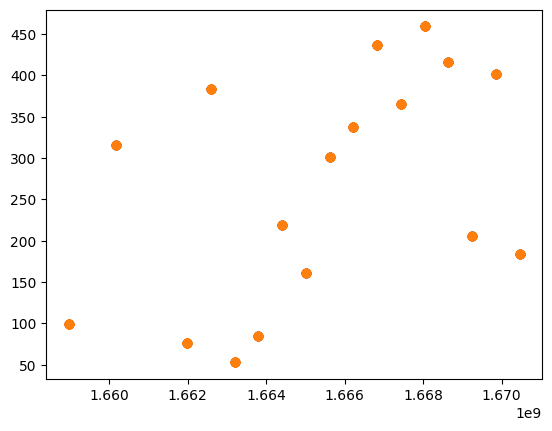

In [33]:

def get_highest(_type):
  unique_time_periods = []
  highest_scores = []
  for _datetime in np.unique(a["Datetime"]):
    # print(_datetime)
    b = a[a["Datetime"] == _datetime]
    # print("Max:", max(b[f"Highest {_type} Skills"][pd.notna(b[f"Highest {_type} Skills"])]))
    for i in range(10):
      try:
        # highest_scores.append(max(b[f"Highest {_type} Skills"][pd.notna(b[f"Highest {_type} Skills"])]))
        highest_scores.append(max(b[f"Score"][pd.notna(b[f"Score"])]))
        # b = b[b[f"Highest {_type} Skills"] != max(b[f"Highest {_type} Skills"][pd.notna(b[f"Highest {_type} Skills"])])]
        unique_time_periods.append(_datetime)
      except Exception as e:
        pass
      

  plt.plot(unique_time_periods, highest_scores, "o")
  print(f"time_periods_{_type.lower()} =",unique_time_periods)
  print(f"scores_{_type.lower()} = ", highest_scores)

get_highest("Driver")
get_highest("Programming")
  

Index(['Rank', 'Score', 'Programming Skills', 'Driver Skills',
       'Highest Programming Skills', 'Highest Driver Skills',
       'Highest Programming Score Timestamp', 'Highest Driver Score Timestamp',
       'Highest Programming Score Stop Time', 'Highest Driver Score Stop Time',
       'Team Number', 'Team Name', 'Organization', 'Event Region',
       'Country/Region', 'Datetime'],
      dtype='object')


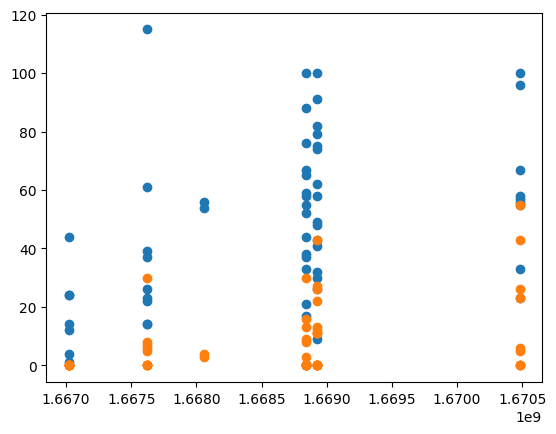

In [12]:
print(a.columns)
# plt.plot(a["Datetime"], a["Highest Driver Skills"], "o")
plt.plot(a["Datetime"], a["Highest Driver Skills"], "o")
plt.plot(a["Datetime"], a["Highest Programming Skills"], "o")
# print(2.9405587061541693e-05 * (1673676000.0 - min(a["Datetime"])))
# plt.plot([1673676000.0, 1673676000.0], [0, 2.9405587061541693e-05 * (1673676000.0 - min(a["Datetime"]))])

In [48]:
ys = (max(a[a["Datetime"] == max(a["Datetime"])]["Highest Driver Skills"]), max(a[a["Datetime"] == min(a["Datetime"])]["Highest Driver Skills"]))
xs = max(a["Datetime"]), min(a["Datetime"])

In [2]:
previous_data = pd.read_csv("../AllVexData.csv")
current_data = pd.read_csv("../AllVexData_2022_12_9.csv")


Find the delta points for a period of time to estimate the points gained as a function of time

In [18]:
def turn_datetimes_to_timestamps(a):
  dates = [z.split(" ")[0] for z in a["Highest Driver Score Timestamp"][pd.notna(a["Highest Driver Score Timestamp"])]]
  dates = [[int(y) for y in z.split("-")] for z in dates]
  timedates = []
  for date in dates:
    timedates.append((datetime.datetime(date[0], date[1], date[2], 0, 0).timestamp() // (3600 * 24 * 7)) * (3600 * 24 * 7))
  a["Datetime"] = timedates
  return a

In [20]:
# Remove any teams that are in the current data that werent in the previous data
current_data = current_data[current_data["Team Number"].isin(previous_data["Team Number"])]

current_data = current_data[pd.notna(current_data["Highest Driver Score Timestamp"])]

# Remove any teams that are in previous data that aren't in current  data
previous_data = previous_data[previous_data["Team Number"].isin(current_data["Team Number"])]
previous_data = previous_data[pd.notna(previous_data["Highest Driver Score Timestamp"])]


current_data = turn_datetimes_to_timestamps(current_data)
previous_data = turn_datetimes_to_timestamps(previous_data)


In [43]:
times = []
slopes = []
scores = []
for row in current_data["Team Number"]:
  # see the index of the team number in previous data
  try:
    index = (previous_data["Team Number"].index[previous_data["Team Number"] == row][0])
  except Exception as e:
    print(e)
  # Change in points
  delta_points = float(current_data["Score"][current_data["Team Number"] == row].values[0] - previous_data["Score"][index])
  if delta_points == 0:
    continue
  # Change in driver skills
  delta_time = float(current_data["Datetime"][current_data["Team Number"] == row] - previous_data["Datetime"][index])
  if delta_time == 0:
    continue
  print(delta_time, delta_points)
  times.append(previous_data["Datetime"][index])
  scores.append(previous_data["Score"][index])
  slopes.append(delta_points / delta_time)

print(slopes)

1209600.0 59.0
3628800.0 70.0
3628800.0 82.0
1209600.0 225.0
1209600.0 70.0
1209600.0 44.0
1209600.0 19.0
3628800.0 181.0
1209600.0 101.0
1814400.0 110.0
2419200.0 58.0
1814400.0 118.0
2419200.0 45.0
4233600.0 130.0
1209600.0 62.0
1814400.0 24.0
4233600.0 25.0
2419200.0 61.0
1814400.0 56.0
1814400.0 66.0
1209600.0 145.0
2419200.0 143.0
4233600.0 38.0
1209600.0 56.0
1209600.0 134.0
1209600.0 12.0
1814400.0 69.0
1209600.0 62.0
2419200.0 11.0
1814400.0 99.0
1209600.0 25.0
4233600.0 38.0
1814400.0 107.0
1209600.0 115.0
1209600.0 13.0
1209600.0 59.0
2419200.0 86.0
1209600.0 35.0
1209600.0 23.0
1814400.0 70.0
2419200.0 54.0
1209600.0 110.0
1814400.0 47.0
3024000.0 51.0
1209600.0 13.0
2419200.0 65.0
2419200.0 120.0
2419200.0 117.0
1209600.0 26.0
2419200.0 91.0
1209600.0 96.0
1814400.0 6.0
4838400.0 38.0
1209600.0 30.0
1814400.0 61.0
1209600.0 100.0
3024000.0 93.0
1814400.0 64.0
1814400.0 36.0
1814400.0 34.0
1814400.0 56.0
4233600.0 53.0
2419200.0 72.0
1814400.0 134.0
1209600.0 88.0
1814400.0 

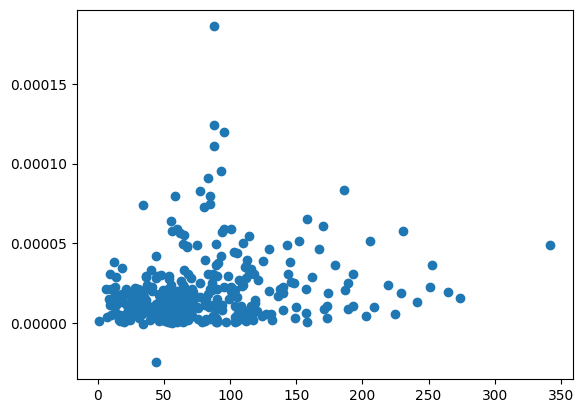

In [44]:
plt.plot(scores, slopes, "o")

In [41]:
print(times)

[1668643200.0, 1666224000.0, 1666224000.0, 1668643200.0, 1668643200.0, 1668643200.0, 1668643200.0, 1666224000.0, 1668643200.0, 1668038400.0, 1667433600.0, 1668038400.0, 1667433600.0, 1665619200.0, 1668643200.0, 1668038400.0, 1665619200.0, 1667433600.0, 1668038400.0, 1668038400.0, 1668643200.0, 1667433600.0, 1665619200.0, 1668643200.0, 1668643200.0, 1668643200.0, 1668038400.0, 1668643200.0, 1667433600.0, 1668038400.0, 1668643200.0, 1665619200.0, 1668038400.0, 1668643200.0, 1668038400.0, 1668643200.0, 1667433600.0, 1668643200.0, 1668643200.0, 1668038400.0, 1667433600.0, 1668643200.0, 1668038400.0, 1666828800.0, 1668643200.0, 1667433600.0, 1668038400.0, 1667433600.0, 1668643200.0, 1667433600.0, 1668643200.0, 1668038400.0, 1665014400.0, 1668643200.0, 1668038400.0, 1668643200.0, 1666828800.0, 1668038400.0, 1668643200.0, 1668038400.0, 1668038400.0, 1665619200.0, 1667433600.0, 1668038400.0, 1668643200.0, 1668038400.0, 1668038400.0, 1668038400.0, 1668038400.0, 1668643200.0, 1668038400.0, 16674